In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-healthiest-food-in-the-world/Top 100 Healthiest Food in the World.csv


# Import need libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import warnings
warnings.simplefilter('ignore')

# Data loading

In [3]:

df = pd.read_csv("/kaggle/input/top-100-healthiest-food-in-the-world/Top 100 Healthiest Food in the World.csv")

# Set display options for better readability
pd.set_option('display.max_rows', None)            
pd.set_option('display.max_columns', None)         
pd.set_option('display.width', 1000)               
pd.set_option('display.float_format', '{:,.2f}'.format) 

print(df)

# Style the DataFrame
styled_df = df.style.highlight_max(axis=0, color='lightgreen').set_table_attributes('style="width:100%; text-align: left;"')
styled_df


                 Food              Nutrition Value (per 100g)               Quantity        Originated From  Calories  Protein (g)  Fiber (g)  Vitamin C (mg)  Antioxidant Score
0                Kale                High in Vitamins A, C, K         1 cup, chopped         Ancient Greece        49         4.30       3.60           93.40               1770
1         Blueberries                    High in Antioxidants                  1 cup          North America        84         1.10       3.60           14.40               9621
2              Salmon             Rich in Omega-3 Fatty Acids                   3 oz    North Pacific Ocean       208        22.10       0.00            0.00                689
3              Garlic                        Contains Allicin                1 clove           Central Asia         4         0.20       0.10            0.90               5708
4             Spinach                 High in Iron and Folate             1 cup, raw         Ancient Persia        

,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.300000,3.600000,93.400000,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.100000,3.600000,14.400000,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.100000,0.000000,0.000000,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.200000,0.100000,0.900000,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.900000,2.200000,28.100000,1515
5,Almonds,Good Source of Vitamin E,1 oz (23 nuts),Middle East,164,6.000000,3.500000,0.000000,4454
6,Broccoli,High in Vitamin C and K,"1 cup, chopped",Italy,31,2.500000,2.400000,81.200000,1510
7,Avocado,Rich in Healthy Fats,1 medium,Central America,320,4.000000,13.500000,10.000000,1922
8,Quinoa,Complete Protein Source,"1 cup, cooked",South America,222,8.100000,5.200000,0.000000,1808
9,Lentils,High in Protein and Fiber,"1 cup, cooked",Middle East,230,17.900000,15.600000,2.100000,7282


# missing values

In [4]:

missing_values = df.isnull().sum()
print(missing_values)

df = df.dropna() 


Food                          0
Nutrition Value (per 100g)    0
Quantity                      0
Originated From               0
Calories                      0
Protein (g)                   0
Fiber (g)                     0
Vitamin C (mg)                0
Antioxidant Score             0
dtype: int64


# Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food                        98 non-null     object 
 1   Nutrition Value (per 100g)  98 non-null     object 
 2   Quantity                    98 non-null     object 
 3   Originated From             98 non-null     object 
 4   Calories                    98 non-null     int64  
 5   Protein (g)                 98 non-null     float64
 6   Fiber (g)                   98 non-null     float64
 7   Vitamin C (mg)              98 non-null     float64
 8   Antioxidant Score           98 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ KB


# Top 10 Foods Based on Antioxidant Score

In [6]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv("/kaggle/input/top-100-healthiest-food-in-the-world/Top 100 Healthiest Food in the World.csv")
print("Data Overview:")
print(df.head())

df['Antioxidant Score'] = pd.to_numeric(df['Antioxidant Score'], errors='coerce')

top_10_antioxidants = df.sort_values(by='Antioxidant Score', ascending=False).head(10)

table = tabulate(top_10_antioxidants, headers='keys', tablefmt='pretty', showindex=False)


print("\nTop 10 Foods Based on Antioxidant Score:")
print(table)


Data Overview:
          Food   Nutrition Value (per 100g)        Quantity      Originated From  Calories  Protein (g)  Fiber (g)  Vitamin C (mg)  Antioxidant Score
0         Kale     High in Vitamins A, C, K  1 cup, chopped       Ancient Greece        49         4.30       3.60           93.40               1770
1  Blueberries         High in Antioxidants           1 cup        North America        84         1.10       3.60           14.40               9621
2       Salmon  Rich in Omega-3 Fatty Acids            3 oz  North Pacific Ocean       208        22.10       0.00            0.00                689
3       Garlic             Contains Allicin         1 clove         Central Asia         4         0.20       0.10            0.90               5708
4      Spinach      High in Iron and Folate      1 cup, raw       Ancient Persia        23         2.90       2.20           28.10               1515

Top 10 Foods Based on Antioxidant Score:
+----------------+-------------------------

# plotting Top 10 Foods Based on Antioxidant Score

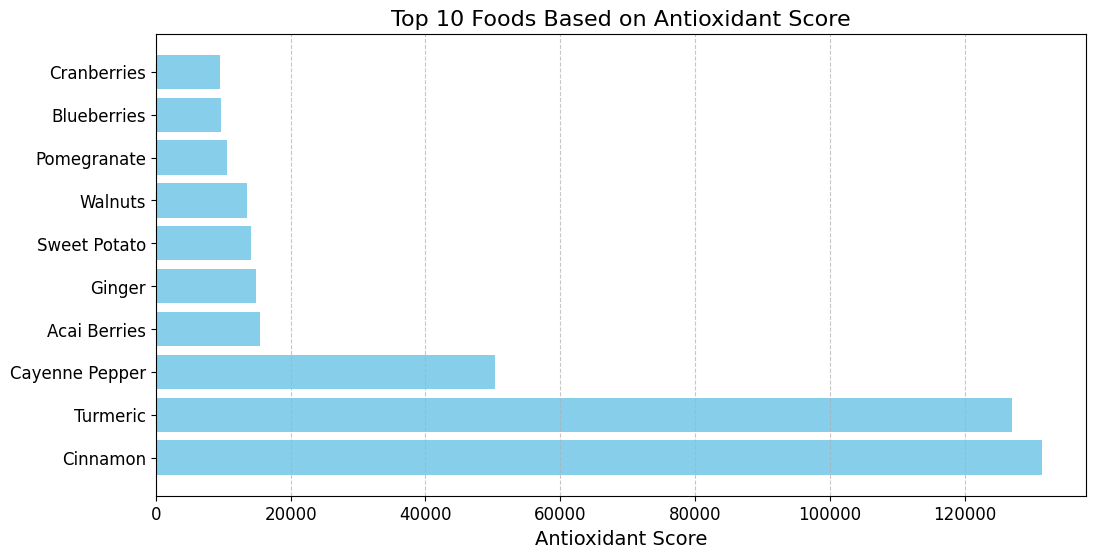

In [7]:

df['Antioxidant Score'] = pd.to_numeric(df['Antioxidant Score'], errors='coerce')

top_10_antioxidants = df.sort_values(by='Antioxidant Score', ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.barh(top_10_antioxidants['Food'], top_10_antioxidants['Antioxidant Score'], color='skyblue')
plt.xlabel('Antioxidant Score', fontsize=14)
plt.title('Top 10 Foods Based on Antioxidant Score', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


# Foods Sorted by Highest Vitamin C Content (mg

In [8]:

print("Data Overview:")
print(df.head())


df['Vitamin C (mg)'] = pd.to_numeric(df['Vitamin C (mg)'], errors='coerce')


sorted_vitamin_c = df.sort_values(by='Vitamin C (mg)', ascending=False)

print("\nFoods Sorted by Highest Vitamin C Content (mg):")
print(tabulate(sorted_vitamin_c, headers='keys', tablefmt='pretty', showindex=False))


Data Overview:
          Food   Nutrition Value (per 100g)        Quantity      Originated From  Calories  Protein (g)  Fiber (g)  Vitamin C (mg)  Antioxidant Score
0         Kale     High in Vitamins A, C, K  1 cup, chopped       Ancient Greece        49         4.30       3.60           93.40               1770
1  Blueberries         High in Antioxidants           1 cup        North America        84         1.10       3.60           14.40               9621
2       Salmon  Rich in Omega-3 Fatty Acids            3 oz  North Pacific Ocean       208        22.10       0.00            0.00                689
3       Garlic             Contains Allicin         1 clove         Central Asia         4         0.20       0.10            0.90               5708
4      Spinach      High in Iron and Folate      1 cup, raw       Ancient Persia        23         2.90       2.20           28.10               1515

Foods Sorted by Highest Vitamin C Content (mg):
+-------------------+---------------

# Top 15 Healthiest Foods Based on Vitamin C Content

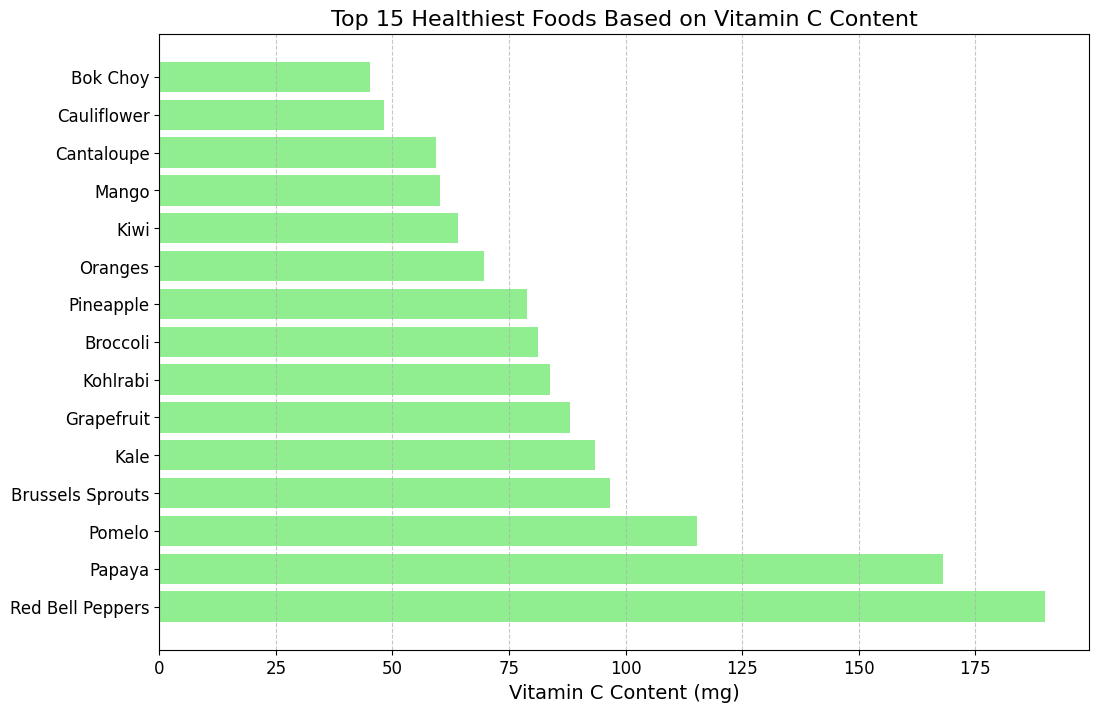

In [9]:

df['Vitamin C (mg)'] = pd.to_numeric(df['Vitamin C (mg)'], errors='coerce')

top_15_vitamin_c = df.sort_values(by='Vitamin C (mg)', ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.barh(top_15_vitamin_c['Food'], top_15_vitamin_c['Vitamin C (mg)'], color='lightgreen')
plt.xlabel('Vitamin C Content (mg)', fontsize=14)
plt.title('Top 15 Healthiest Foods Based on Vitamin C Content', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


# Top 10 Foods by Protein Content & Top 10 Foods by Calories Content

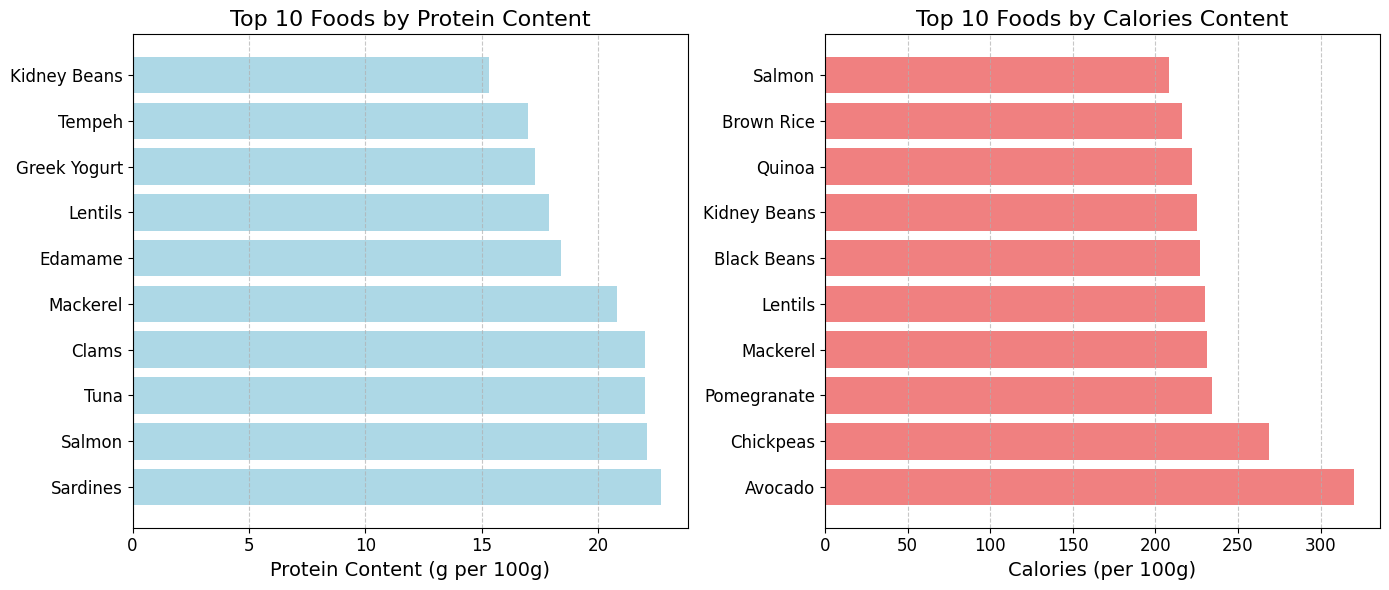

In [10]:

df['Protein (g)'] = pd.to_numeric(df['Protein (g)'], errors='coerce')
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

top_protein = df.sort_values(by='Protein (g)', ascending=False).head(10)

top_calories = df.sort_values(by='Calories', ascending=False).head(10)

plt.figure(figsize=(14, 6))

# Plot for Protein
plt.subplot(1, 2, 1)
plt.barh(top_protein['Food'], top_protein['Protein (g)'], color='lightblue')
plt.xlabel('Protein Content (g per 100g)', fontsize=14)
plt.title('Top 10 Foods by Protein Content', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Plot for Calories
plt.subplot(1, 2, 2)
plt.barh(top_calories['Food'], top_calories['Calories'], color='lightcoral')
plt.xlabel('Calories (per 100g)', fontsize=14)
plt.title('Top 10 Foods by Calories Content', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Top 10 Foods by Fiber and Antioxidant Score

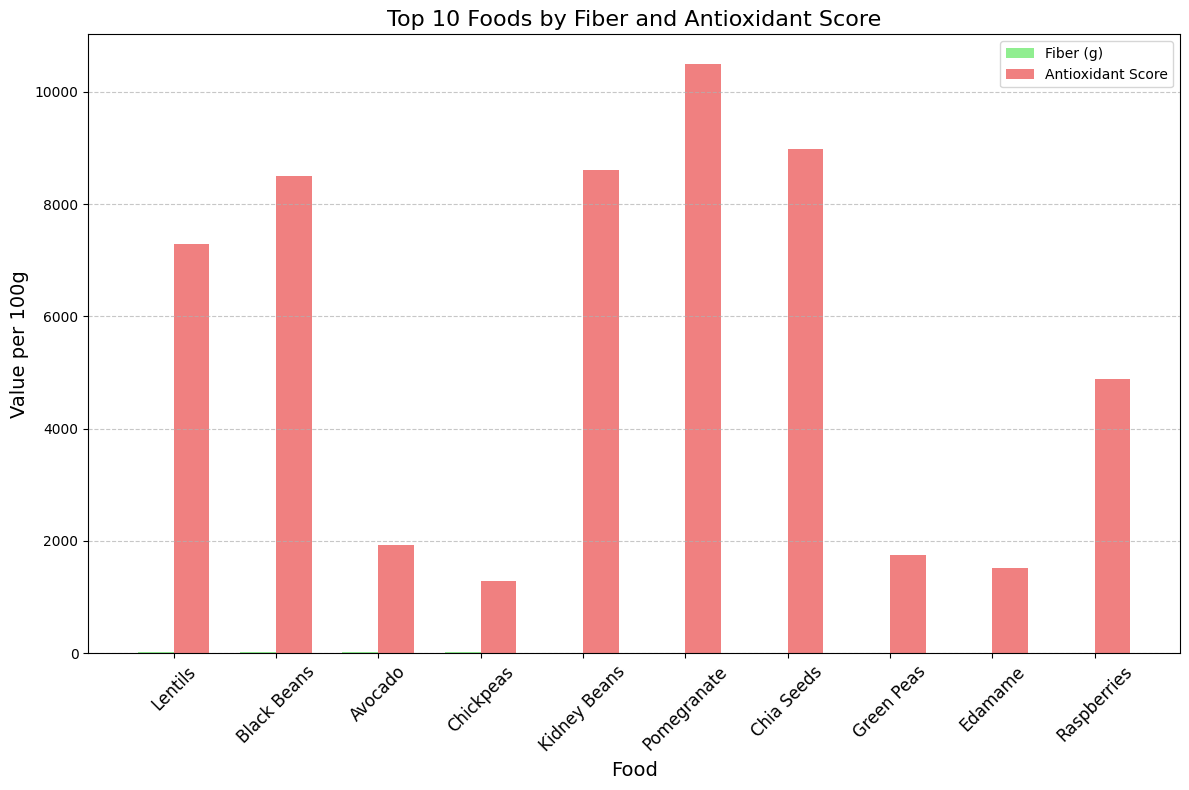

In [11]:

df['Fiber (g)'] = pd.to_numeric(df['Fiber (g)'], errors='coerce')
df['Antioxidant Score'] = pd.to_numeric(df['Antioxidant Score'], errors='coerce')


top_foods = df.sort_values(by='Fiber (g)', ascending=False).head(10)


plt.figure(figsize=(12, 8))


bar_width = 0.35
index = np.arange(len(top_foods['Food']))

plt.bar(index, top_foods['Fiber (g)'], bar_width, label='Fiber (g)', color='lightgreen')
plt.bar(index + bar_width, top_foods['Antioxidant Score'], bar_width, label='Antioxidant Score', color='lightcoral')


plt.xlabel('Food', fontsize=14)
plt.ylabel('Value per 100g', fontsize=14)
plt.title('Top 10 Foods by Fiber and Antioxidant Score', fontsize=16)
plt.xticks(index + bar_width / 2, top_foods['Food'], rotation=45, fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


# descriptive stats

In [12]:

descriptive_stats = df[['Fiber (g)', 'Antioxidant Score', 'Protein (g)', 'Calories']].describe()
print(descriptive_stats)


       Fiber (g)  Antioxidant Score  Protein (g)  Calories
count      98.00              98.00        98.00     98.00
mean        3.03           6,107.46         4.36     83.48
std         3.38          18,831.23         5.91     75.61
min         0.00               0.00         0.00      1.00
25%         0.85             989.00         0.83     19.25
50%         2.15           1,540.00         1.60     61.00
75%         3.50           4,277.25         4.92    135.50
max        15.60         131,420.00        22.70    320.00


# Exploratory Data Analysis (EDA)

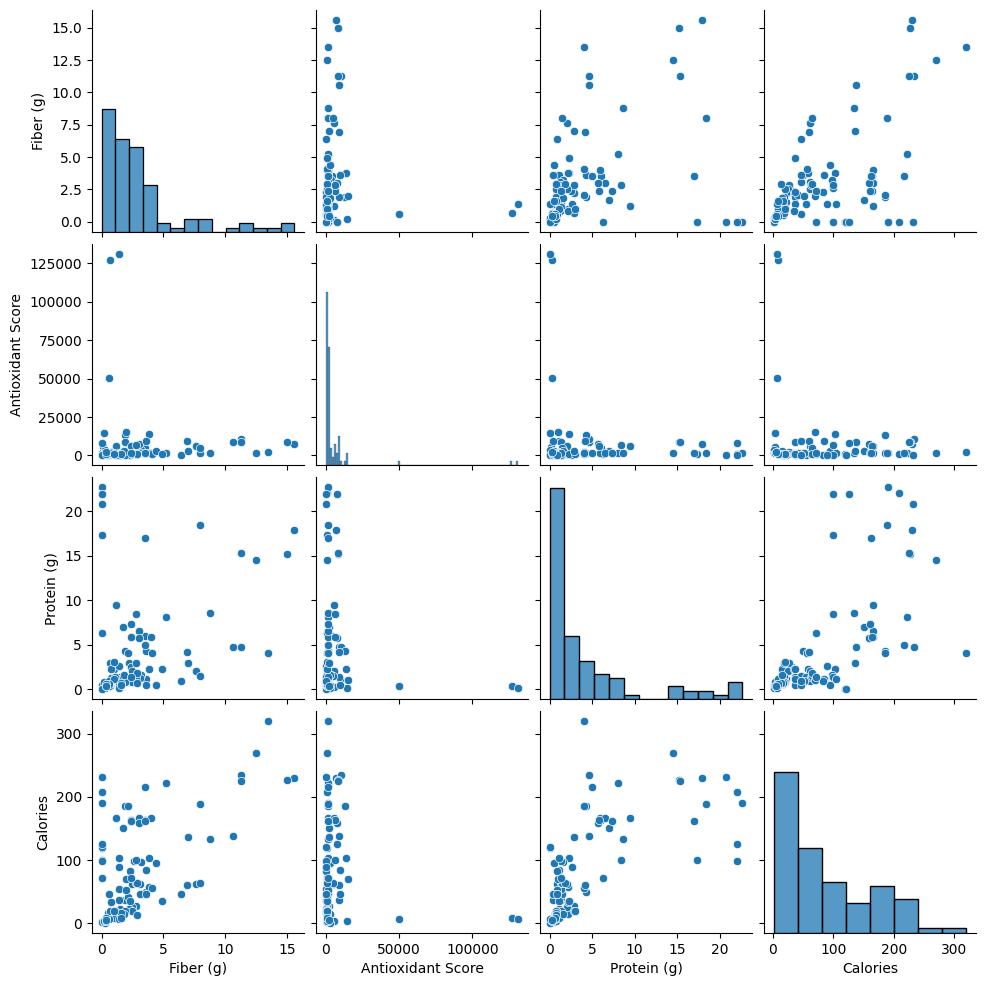

In [13]:
import seaborn as sns
sns.pairplot(df[['Fiber (g)', 'Antioxidant Score', 'Protein (g)', 'Calories']])
plt.show()


# Heatmap: Use a heatmap to visualize correlations between different nutrients

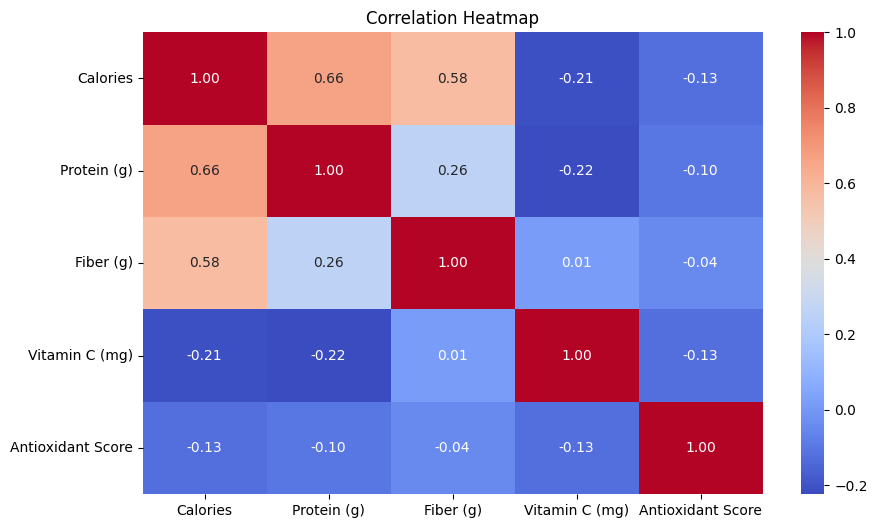

In [14]:


df = pd.read_csv("/kaggle/input/top-100-healthiest-food-in-the-world/Top 100 Healthiest Food in the World.csv")

numeric_df = df.select_dtypes(include='number')

numeric_df = numeric_df.dropna()

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# In-Depth Analysis

In [15]:

df = pd.read_csv("/kaggle/input/top-100-healthiest-food-in-the-world/Top 100 Healthiest Food in the World.csv")


numeric_cols = df.select_dtypes(include='number').columns
origin_nutrition = df.groupby('Originated From')[numeric_cols].mean()

print(origin_nutrition)


                       Calories  Protein (g)  Fiber (g)  Vitamin C (mg)  Antioxidant Score
Originated From                                                                           
Africa                    46.00         0.90       0.60           12.30             182.00
Ancient Greece            30.00         2.70       2.50           53.05           1,418.50
Ancient Persia           104.00         3.60       2.05           14.25           7,528.00
Ancient Rome              56.00         4.00       4.10           96.70             980.00
Asia                     216.00         5.00       3.50            0.00           1,523.00
Asia Minor                97.00         1.60       3.20           10.80           3,747.00
Caribbean                 52.00         0.90       2.00           88.10           1,548.00
Central America          152.80         5.26       7.80           40.88           4,244.60
Central Asia              97.60         3.54       2.32            4.38           4,669.00

#  Plot Mean Nutrition Values

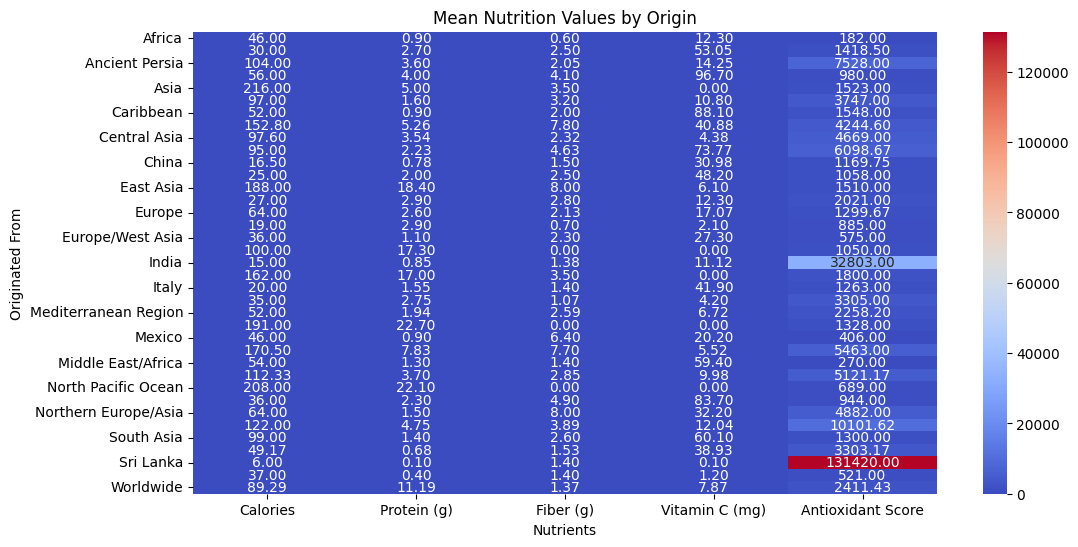

In [16]:


df = pd.read_csv("/kaggle/input/top-100-healthiest-food-in-the-world/Top 100 Healthiest Food in the World.csv")
numeric_cols = df.select_dtypes(include='number').columns
origin_nutrition = df.groupby('Originated From')[numeric_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(origin_nutrition, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Nutrition Values by Origin')
plt.ylabel('Originated From')
plt.xlabel('Nutrients')
plt.show()


# Comparative Analysis by Food Origin

<Figure size 1500x800 with 0 Axes>

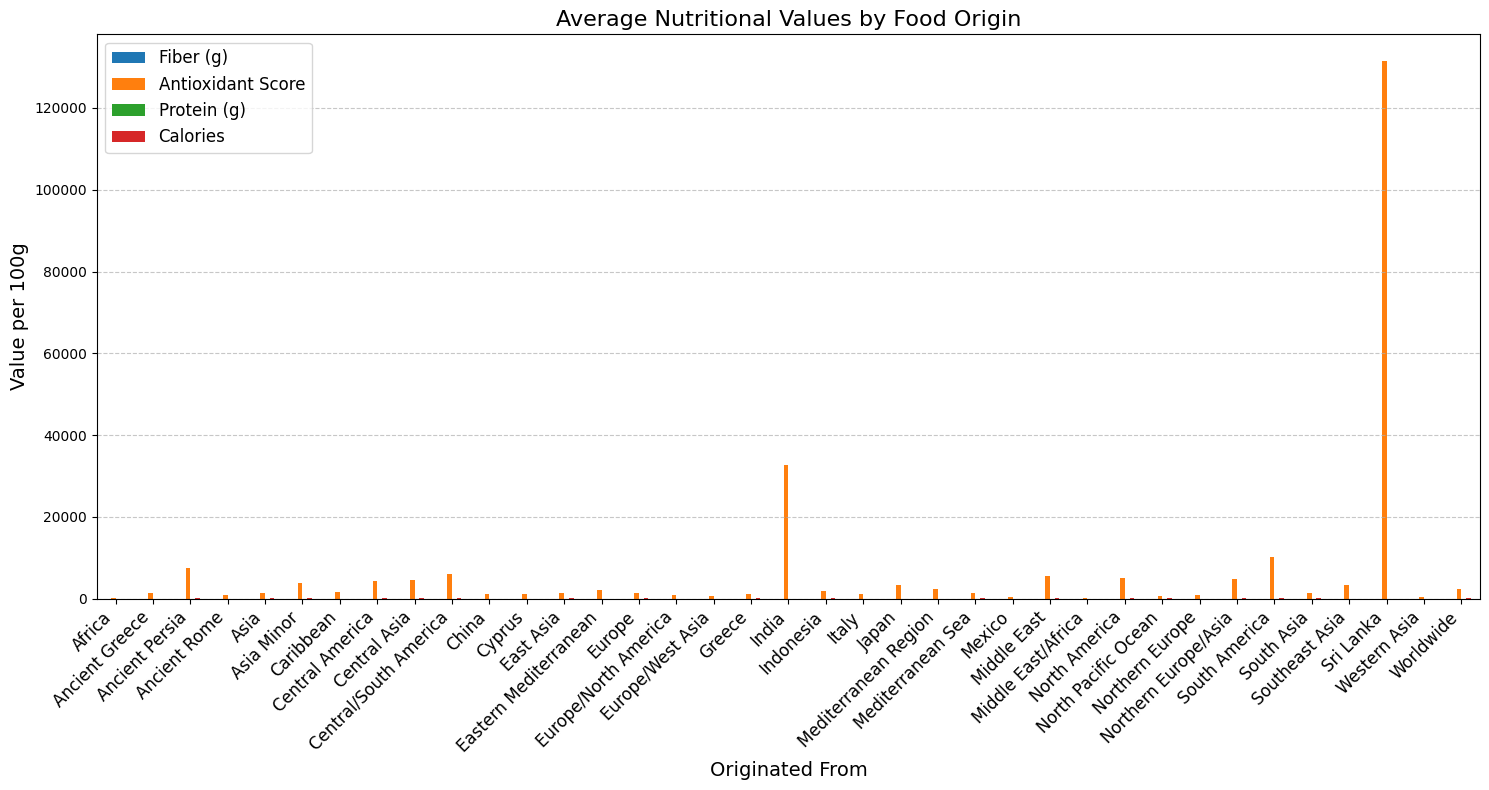

In [17]:

origin_nutrition = df.groupby('Originated From')[['Fiber (g)', 'Antioxidant Score', 'Protein (g)', 'Calories']].mean().reset_index()


plt.figure(figsize=(15, 8))

ax = origin_nutrition.plot(x='Originated From', kind='bar', figsize=(15, 8), legend=True)

plt.title('Average Nutritional Values by Food Origin', fontsize=16)
plt.ylabel('Value per 100g', fontsize=14)
plt.xlabel('Originated From', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.legend(['Fiber (g)', 'Antioxidant Score', 'Protein (g)', 'Calories'], fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()


# Relationship Between Nutrients

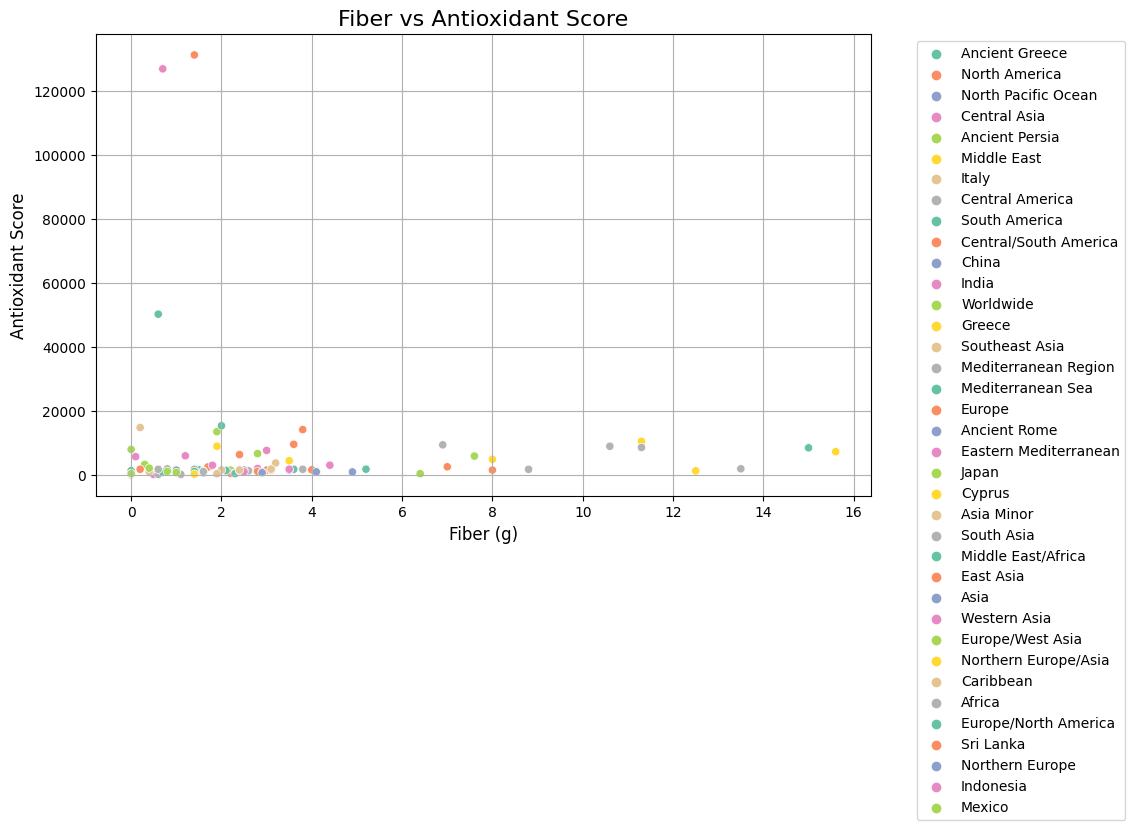

In [18]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fiber (g)', y='Antioxidant Score', hue='Originated From', palette='Set2')
plt.title('Fiber vs Antioxidant Score', fontsize=16)
plt.xlabel('Fiber (g)', fontsize=12)
plt.ylabel('Antioxidant Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# predicting one nutrient based on others

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Fiber (g)', 'Antioxidant Score', 'Protein (g)']]  # Features
y = df['Calories']  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)

# Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 9.67797845e+00 -2.24458031e-04  6.80904018e+00]
Intercept: 27.062848620419018
